# Part I - PISA DATA EXPLORATION


## by Mandieng Bot

## Introduction
> PISA is a worldwide study by OECD in member and non-member nations intended to evaluate educational systems by measuring 15-year-old students scholastic performance on mathematics, science, and reading.

>The purpose of this Analysis is to explore how factors like students behaivior, gender and interests affects the  student's performance and Problem solving ability
Other questions this analysis will aim to answer is wether there are differences in achievemets based on gender and student's attitude (drive)


## Preliminary Wrangling

My Data cleaning process can be found [here](https://github.com/mandeebot/new_new/blob/main/pisa-data-cleaning-note.ipynb).

This dataset contains information from 485,490 students and 646 features.
Due low computing resources and the size of the dataset,moving further i will further categorize and streamline the dataset into these categorise for easy analysis.
These will be the features that will be used for my analysis, as i believe they will help me in answering the questions raised.


>Student Information
- CNT: Country
- ST04Q01: Gender

>Motivation
- ST29Q02: Worthwhile for Work
- ST29Q05: Worthwhile for Career Chances
- ST29Q07: Important for Future Study
- ST29Q08: Helps to Get a Job

>Interest
- ST29Q01: Enjoy Reading
- ST29Q03: Look Forward to Lessons
- ST29Q04: Enjoy Maths
- ST29Q06: Interested in Maths

>Behaviour
- ST49Q03: (Extracurricular) Activity
- ST49Q04: Participate in Competitions
- ST49Q05: Study More Than 2 Extra Hours a Day
- ST49Q06: Play Chess
- ST49Q07: Computer programming
- ST49Q09: Participate in Math Club

>Performance
- 'ST01Q01': 'internationalGrade'
- 'PV1MATH': 'MathScore',
- 'PV1READ': 'ReadScore',
- 'PV1SCIE': 'ScienceScore'

For the categorise, i further encoded the categorical values in each category(except the performance category), sumed them up ad average out the scores to have one single category score to represent each  category of features, further cutting down the number of features i have to work with.

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [40]:
data = pd.read_csv('fdata_cleaned')
data.head(2)

,Unnamed: 0,country,birthYear,gender,internationalGrade,talkAboutMaths,helpFriendsMaths,extracurricularActivity,participateInCompetitions,studyMoreThan2ExtraHoursADay,...,ProblemSolvingSeekExplanations,ProblemSolvingCanLinkFacts,ProblemSolvingLikeSolveComplexProblems,MathScore,ReadScore,ScienceScore,motivation,interest,behaivior,prob_solv_skills
0,105097,Switzerland,1996,Male,10,Sometimes,Sometimes,2.0,1.0,2.0,...,4.0,4.0,4.0,492.1405,392.9348,426.2775,3.50,3.25,1.333333,3.8
1,270652,Italy,1996,Male,10,Never or rarely,Sometimes,1.0,3.0,2.0,...,2.0,2.0,5.0,533.7358,506.8110,515.4233,3.25,2.75,2.000000,3.2


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97098 entries, 0 to 97097
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               97098 non-null  int64  
 1   country                                  97098 non-null  object 
 2   birthYear                                97098 non-null  int64  
 3   gender                                   97098 non-null  object 
 4   internationalGrade                       97098 non-null  int64  
 5   talkAboutMaths                           62688 non-null  object 
 6   helpFriendsMaths                         62582 non-null  object 
 7   extracurricularActivity                  62401 non-null  float64
 8   participateInCompetitions                62478 non-null  float64
 9   studyMoreThan2ExtraHoursADay             62503 non-null  float64
 10  playChess                                62515

In [42]:
data.shape

(97098, 33)

In [43]:
#change datatypes
data.gender = data.gender.astype('category')
data.country = data.country.astype('category')
data.birthYear = data.birthYear.astype('category')

# fix inconsistent formatting in country name
data.country = data.country.apply(lambda x: x.strip())

# test that formatting was successful
print(type(data.gender[5]))
print(type(data.birthYear[70]))
print(type(data.country[4]))
print('incosistency in country nameing fixed \b : ',(data.country == 'United States of America ').sum())

<class 'str'>
<class 'numpy.int64'>
<class 'str'>
incosistency in country nameing fixed  :  0


In [44]:
#creating new feature
# calculate an academic average for each student
data['academic_avg'] = (data.MathScore + data.ReadScore + data.ScienceScore)/3


In [45]:
data = data[['country','birthYear','gender','internationalGrade','motivation','interest','behaivior',
             'prob_solv_skills','MathScore','ReadScore','ScienceScore','academic_avg']]
data.head(2)

,country,birthYear,gender,internationalGrade,motivation,interest,behaivior,prob_solv_skills,MathScore,ReadScore,ScienceScore,academic_avg
0,Switzerland,1996,Male,10,3.50,3.25,1.333333,3.8,492.1405,392.9348,426.2775,437.1176
1,Italy,1996,Male,10,3.25,2.75,2.000000,3.2,533.7358,506.8110,515.4233,518.6567


In [46]:
data.describe()

,internationalGrade,motivation,interest,behaivior,prob_solv_skills,MathScore,ReadScore,ScienceScore,academic_avg
count,97098.000000,62496.000000,62236.000000,61639.000000,61736.000000,97098.000000,97098.000000,97098.000000,97098.000000
mean,9.821335,2.991643,2.445642,1.552226,2.485807,469.380310,471.712335,475.535599,472.209415
std,3.800168,0.740076,0.779372,0.573041,0.817387,103.161735,102.524481,101.461640,98.172324
min,7.000000,1.000000,1.000000,1.000000,1.000000,85.846700,0.083400,20.179000,60.042400
25%,9.000000,2.500000,2.000000,1.166667,2.000000,395.084900,403.279900,404.457300,403.026017
50%,10.000000,3.000000,2.500000,1.333333,2.400000,466.124000,475.160300,475.326400,472.144933
75%,10.000000,3.500000,3.000000,1.833333,3.000000,540.746200,543.860900,547.034700,541.517017
max,96.000000,4.000000,4.000000,4.000000,5.000000,924.840300,889.258700,840.861600,845.848700


### What is the structure of your dataset?

> The data contains over 400,000 responses with over 600 variables. The variables are a variety of formats: nominal and ordinal categorical, discrete and continuous quantitative, and plain text. Due to the large size of the dataset however, we will be working with just a sample of 97098 data observations from the data set

### What is/are the main feature(s) of interest in your dataset?

> For this Project, the main features of interest is centered round the student; the student demographic, the students Maths interest, the student's motivation, student's study behaivior and student's performances in Science, Reading and Maths

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The summary variables in the data set combine similar measures of student information into a single quantitative or categorical value. This allows for direct comparison between countries and students for analysis. The following variables will be used:

- Student Demographics
identification (STIDSTD)
- country of residence (OECD, NC)
- gender (ST04Q01)
- students academic performance (PV1MATH, PV1READ, PV1SCIE)
- Maths interests measurements (ST29Q06, ST29Q04, ST29Q06, ST29Q01, ST49Q01,ST49Q02)
- motivation (ST29Q02, ST29Q05, ST29Q07,ST29Q08)
- Students extracurricullar behaivior (ST49Q03, ST49Q04, ST49Q05, ST49Q06,ST49Q07,ST49Q09)
- students Problem solving skills (ST94Q05, ST94Q06, ST94Q09, ST94Q10, ST94Q14)


In [47]:
#igore warnings
warnings.filterwarnings("ignore")

#setting visualization style
sb.set_style('whitegrid')

#useful functions for creating plots
def barplot(x,data):
#data['prob_solv_skills'].value_counts().plot(kind='bar')
#plot distribution of international grade
    plt.figure(figsize = (11,6))
    data[x].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {x}")
    plt.xlabel("scores")
    plt.ylabel("Frequency");
    
#useful function to plot countplots
def cplot(x,data):
    plt.figure(figsize=[12,6])
    sb.countplot(x = x,data = data)
    plt.title(f'distribution of {x} feature', size=15)
    plt.xlabel(x);
    
#functio to plot dist plots    
def histplot(x,data,bins):
    plt.figure(figsize=(10,7))
    plt.title(f'distribution of {x} feature')
    sb.distplot(data[x],bins=bins);

## Univariate Exploration

Will Start off my analysis with exploring the International grade feature, by identifying the most common sample demographics and how can we utilise this for further analysis? 

We start off our univariate analysis by examining the distribution of the International grades feature

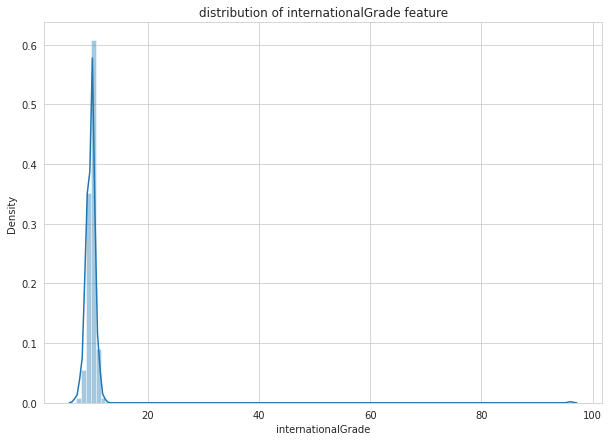

In [48]:
#examine the distribution of the international grade feature
histplot('internationalGrade',data,100)

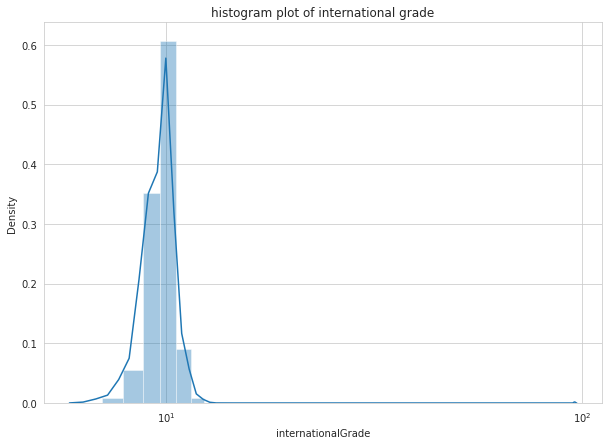

In [49]:
#applying transforms by putting a log function 
plt.figure(figsize=(10,7))
sb.distplot(data['internationalGrade'],bins=100);
plt.xscale('log')
plt.title('histogram plot of international grade')
#plt.savefig('grade.png')

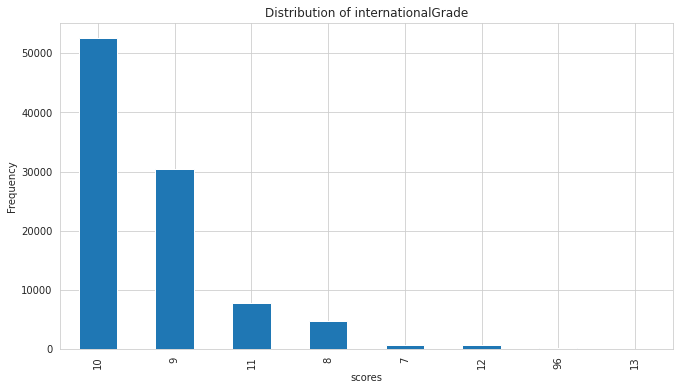

In [50]:
#plot distribution of international grade
barplot('internationalGrade',data)

looking at the distribution we see a spike in the frequency of the grades that fall within 9 to 11, which goes to show that a large portion of the students grades fall withi 9 to 11, with 10 being the most frequent grade from our sample
we can also make out from the visualizations that 55000+, roughly more than halve of the sample size has a grade score of 10, then followed by about 30000+ having a grade of 9.

Now lets explore the Problem solving skills/ability feature

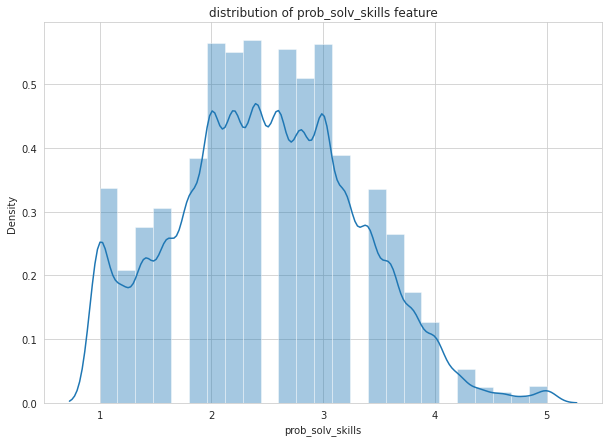

In [51]:
histplot('prob_solv_skills',data,25);

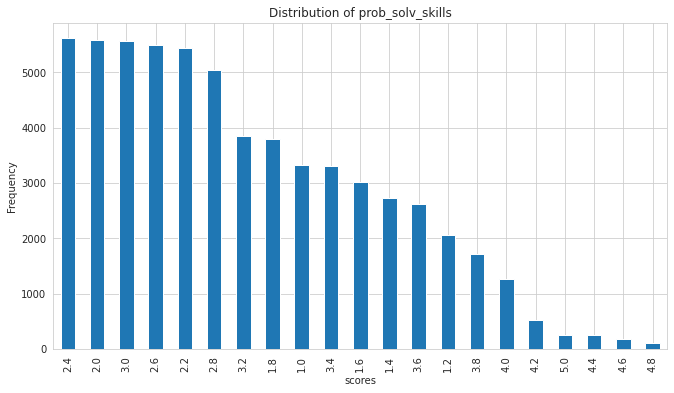

In [52]:
#distribution of the problem solving ability feature
barplot('prob_solv_skills',data)

From the distributios above, we can see that the distribution of problem solving skills being Gaussian, but also we can point out the frequency size of each score, which is good as it will give us a idea of the frequency of observations that falls in any given score. 

Next we explore the distribution of the  gender feature, which will help us understand how split/balance our data sample is

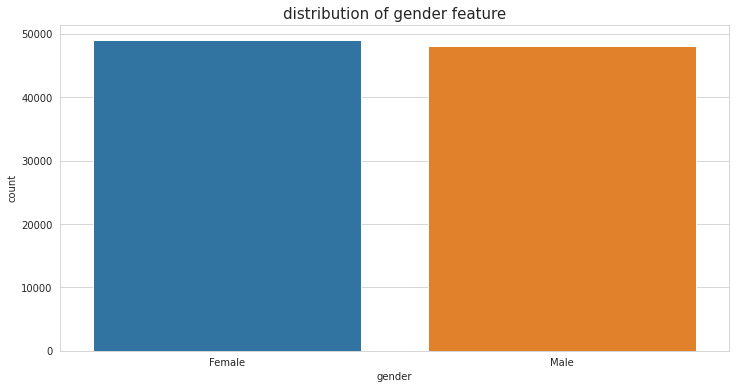

In [53]:
#plots countplot gender
cplot('gender',data)

From the plot we can easily point out, that there isn't much significant difference in the distribution of the two genders in our sample. so we have a pretty balanced dataset in terms of gender.

We next examine the the distribution of the birthyear feature

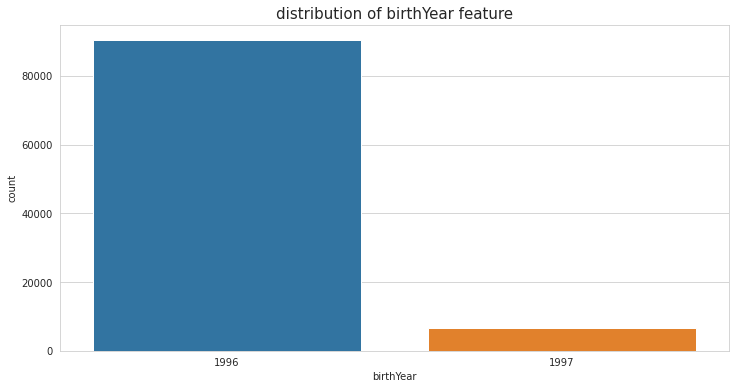

In [54]:
#distribution of the birthyear
cplot('birthYear',data)

In [55]:
data.birthYear.unique()

[1996, 1997]
Categories (2, int64): [1996, 1997]

looking at the visualizatio above, a large portion of the sample drawn are having birth year 1996, this could either mean that most of the students are age-mates, our data sample is simply poor in terms of variety of birthyear

What are the top 10 countries with the highest students count in our sample? Moving further in our analysis, we'ill now explore the distribution of the countries invovled as well as how this interacts with other features

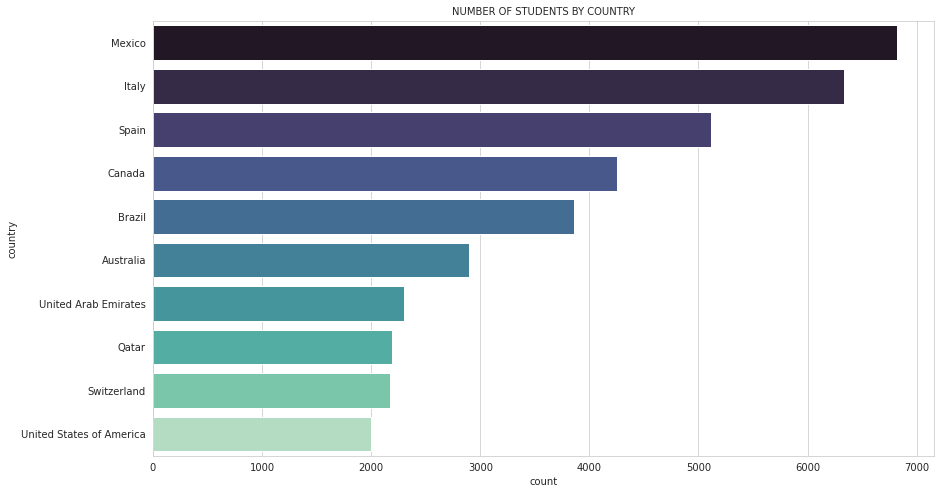

In [56]:
#top 10 countries with the highest number of students
order= data['country'].value_counts().index

plt.figure(figsize=[14,8])
sb.countplot(data=data,y='country',order=order[:10],palette='mako')
plt.title('NUMBER OF STUDENTS BY COUNTRY',size=10);

In [57]:
order[-10:]

CategoricalIndex(['New Zealand', 'Tunisia', 'Poland', 'France', 'Latvia',
                  'Netherlands', 'Iceland', 'United Kingdom (Scotland)',
                  'Perm (Russian Federation)', 'Liechtenstein'],
                 categories=['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', ...], ordered=False, dtype='category')

Looking at the visualizatio above, Mexico seems to have the highest number of studets involved, closely followed by italy with Spain coming 3rd respectively.
The country with the least amount of studet involvement from our sample remains Liechtenstien.

Next we explore the distributions of the features motivation, behaivior, interest and problem solving skills

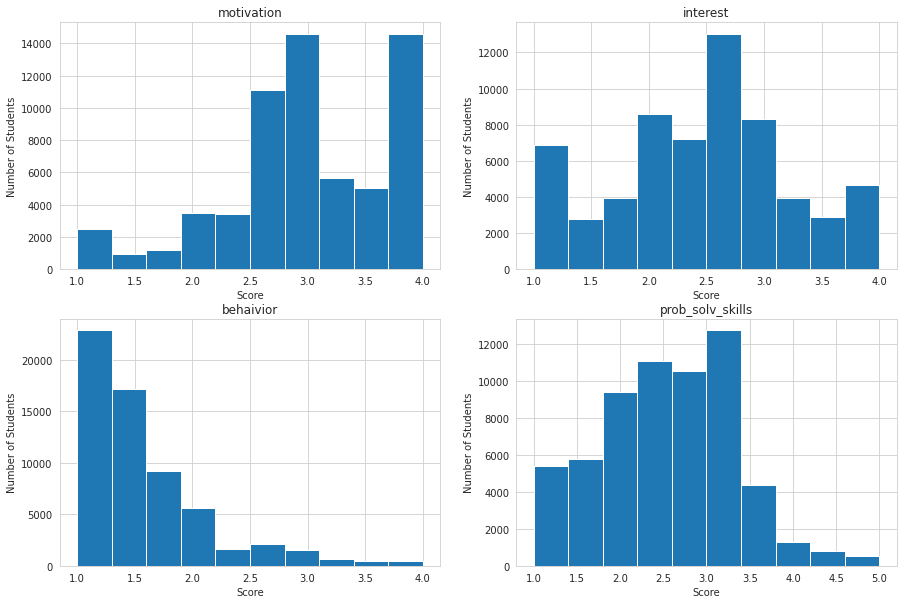

In [58]:
#Subsection drive
st_drive=['motivation','interest','behaivior','prob_solv_skills']

fig, ax= plt.subplots(nrows=2,ncols=2,figsize=[15,10])

#binsizes were determined by number of questions per section.
#binsizes = 1/(number of questions per section)
binsizes=[1/4,1/5,1/4,1/5]

ax=ax.flatten()
i=0

for feature in st_drive:
    #bins = np.arange(min(data[feature]), max(data[feature]) + binsizes[i], binsizes[i])
    ax[i].hist(data=data, x=feature)#,bins=bins)
    ax[i].set_xlabel('Score')
    ax[i].set_ylabel('Number of Students')
    ax[i].set_title(feature)
    i+=1

- under the motivation feature, it looks like the graph is slighly skewed to the left with spikes at point

- Interest feature seems a bit bimodal, but it indicates a general interest in maths activities like 

- behavior is positively skewed, highlighting  that most students do not take extra actions towards Mathematics such as taking about math with friends, play chess, or computer programming

- Problem solving skills feature seems abit postively skewed, but we can point out that a majority of our sample population possess from little to average problem solving skills 

We move on to explore and the distributions of the scores of Maths, Science and Reading (student performance) and answer the question wether or not their exist any noticeable differences

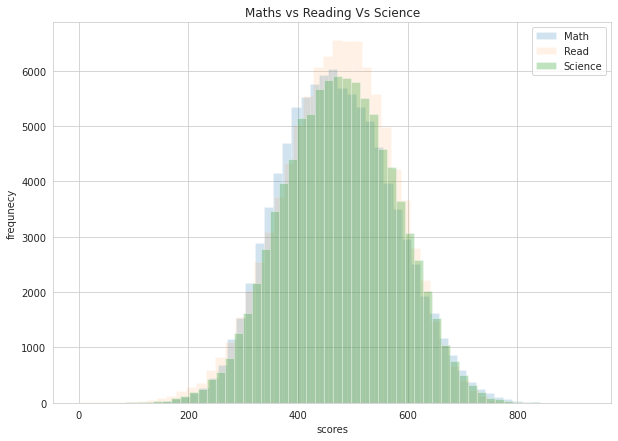

In [59]:
#exploring the distributions of the scores of maths, reading and science
import pylab as plt

plt.figure(figsize=(10,7))
plt.hist(data.MathScore,bins=50, alpha=0.2,label='Math')
plt.hist(data.ReadScore,bins=50, alpha=0.1, label='Read')
plt.hist(data.ScienceScore,bins=50, alpha=0.3, label='Science')
plt.title('Maths vs Reading Vs Science')
plt.xlabel('scores')
plt.ylabel('frequnecy')
plt.legend(loc='upper right');

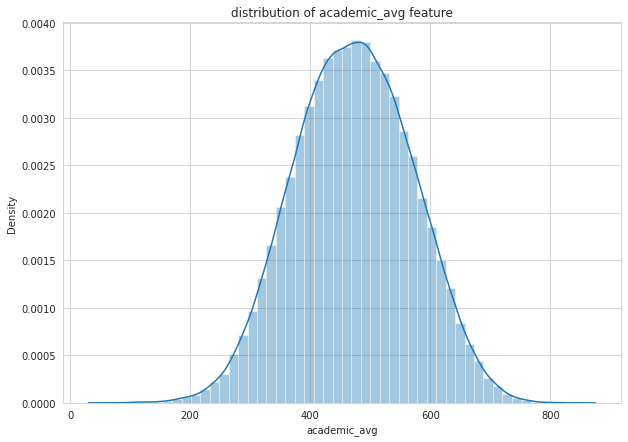

In [60]:
#distribution of the academic average feature
histplot('academic_avg',data,50)

All three evaluations of scores of Maths,Reading and Science are somewhat Normally distributed with centers around 400 to 600. The academic feature, measure the students' avergae performance across these three areas, so it sort of makes sense for the distribution to be gaussian

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the iternatioal grade feature, due to the presence of an outlier, i applied a log transform to zoom into the data and focus on the information that matters
> Mexico, italy and Spain are the countries with a high number of students in the sample

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, i created a new feature; average score, which is the avaerage of students performances across Maths, Reading and Science
> 

## Bivariate Exploration

> We start of by looking at the relationship between the gender feature and the International grade feature. is there any relatioship between the two features? As a starting point for other relatioships we aim to explore 

Text(0.5, 1.0, 'Gender Vs Grade')

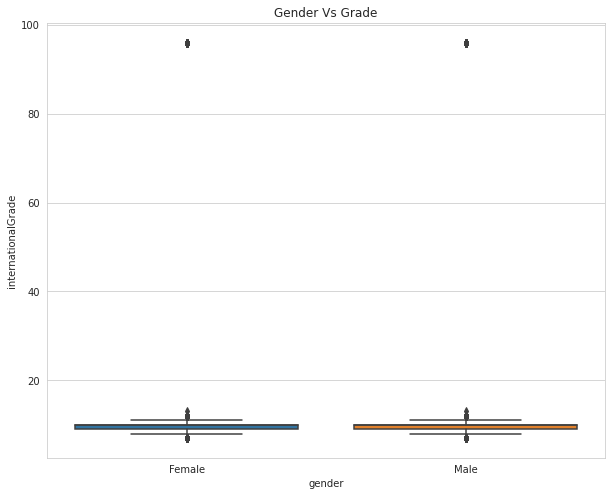

In [61]:
#gender vs international grade
plt.figure(figsize=(10,8))
sb.boxplot(data=data,x='gender',y='internationalGrade');
plt.title('Gender Vs Grade')

Text(0.5, 1.0, 'Grade vs Performance vs Gender')

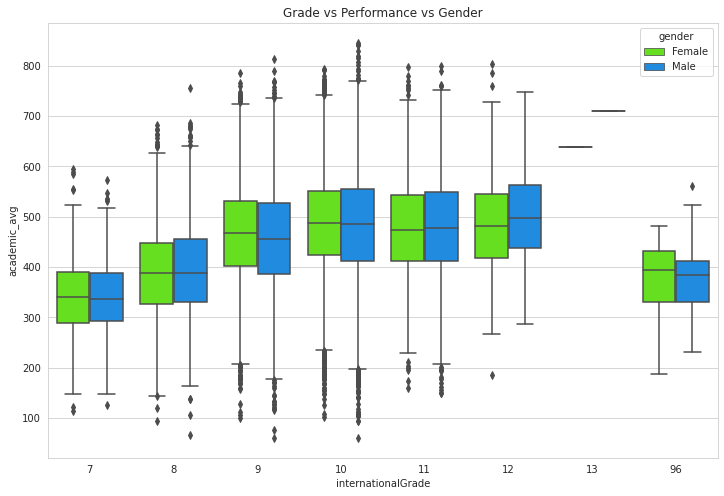

In [62]:
#exploring the relatioship between grade Vs Academic avg across Gender;
plt.figure(figsize=(12, 8))
sb.boxplot(
    data=data, x="internationalGrade", y="academic_avg",hue='gender', palette="gist_rainbow"
)
plt.title('Grade vs Performance vs Gender')

A look at the relatioship between these two features, depicts some form of positive relationship between the academic average of students and the students' grade, this makes actual sense, as one would expect to see a higher average score being synonimous with having a high grade. Comparing the average score by gender also depicts that on average male tend to perform a little better than females, though the differences in performaces isn't very much significant
 

Next We will like to know how distribution of students peformance is by their country's?, we answer that by exploring the average performance of students' by the country 

<AxesSubplot:xlabel='country'>

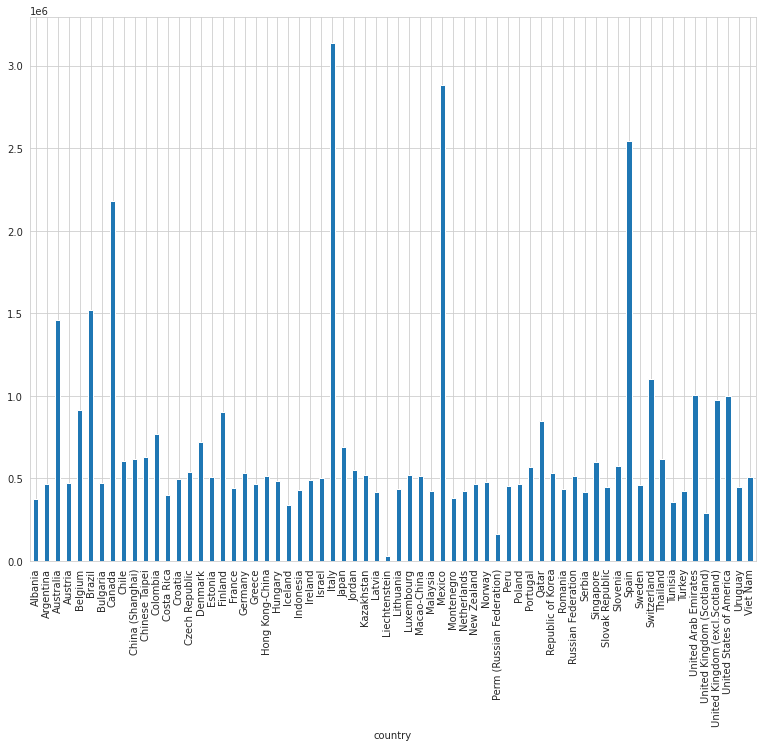

In [63]:
#country vs studets average performance
plt.figure(figsize=(13,10))
gg = data.groupby('country')['academic_avg']
gg.sum().plot(kind='bar')

<AxesSubplot:xlabel='country'>

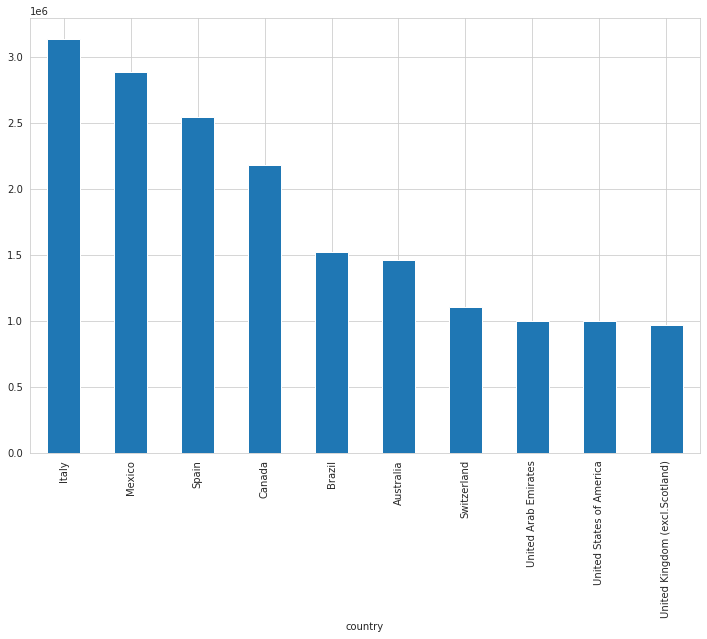

In [64]:
#plot out the top 10 high student's performing countries
plt.figure(figsize=(12,8))
gg.sum().sort_values(ascending=False).head(10).plot(kind='bar')

from the visualizatio above, italy seems to top country in terms of student's performance on average, followed by Mexico, the Spain then Canada. though this findig is subject to more exploration

Next we seek to answer the question whether or not there is any relatioship between students academic performance in Maths, Reading, Science and gender of the student 

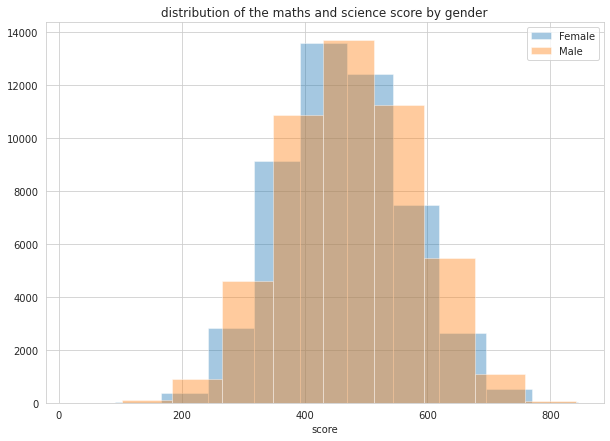

In [65]:
#distribution of maths and science score by gender
plt.figure(figsize=(10,7))
binsize=25
plt.title('distribution of the maths and science score by gender')
plt.hist(data = data.query('gender=="Female"'),x ='MathScore', alpha =.4,label ='Female')
plt.hist(data = data.query('gender=="Male"'),x ='ScienceScore', alpha =.4, label  ='Male')
plt.xlabel('score')

plt.legend();

Distribution of scores in the maths and science features versus student's gender is quite normal, male students though tend to edge out by a little bit when compared with their female counterparts with centers around 500

Now lets analyse the distribution of the student's performances in Reading, Maths and Sciences by their gender.

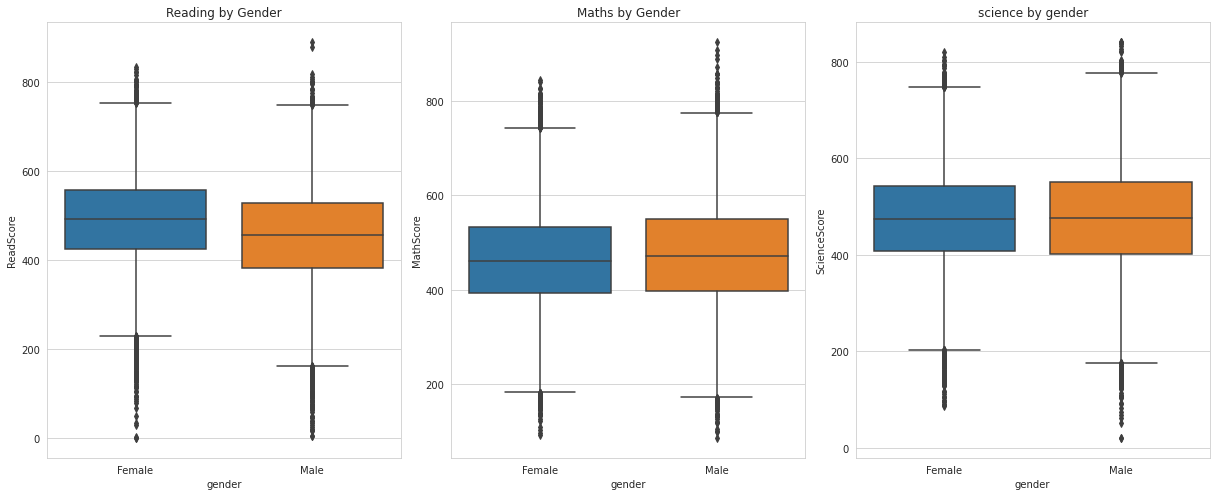

In [66]:
# graph the distribution of academic performance according to gender
fig = plt.figure(figsize=(17,7))
ax1 = fig.add_subplot(131)
sb.boxplot(data=data, y='ReadScore', x='gender')
ax1.title.set_text('Reading by Gender')
ax2 = fig.add_subplot(132)
ax2.title.set_text('Maths by Gender')
sb.boxplot(data=data, y='MathScore', x='gender')
ax3 = fig.add_subplot(133)
sb.boxplot(data=data, y='ScienceScore', x='gender')
ax3.title.set_text('science by gender')
plt.tight_layout()
#plt.savefig('perfomance.png')

Looking at the plot of students performances above; in terms of reading we can see that females tend to score higher in ranges than their male counters

A look at the maths score tells a different story; here we see that males tend to perform better than females
lastly in sciences, the differences are not that sigificant

Now we explore the distributions of the scores in student's motivation(drive), interest, problem solving skills and behaivior(extraculular activites)

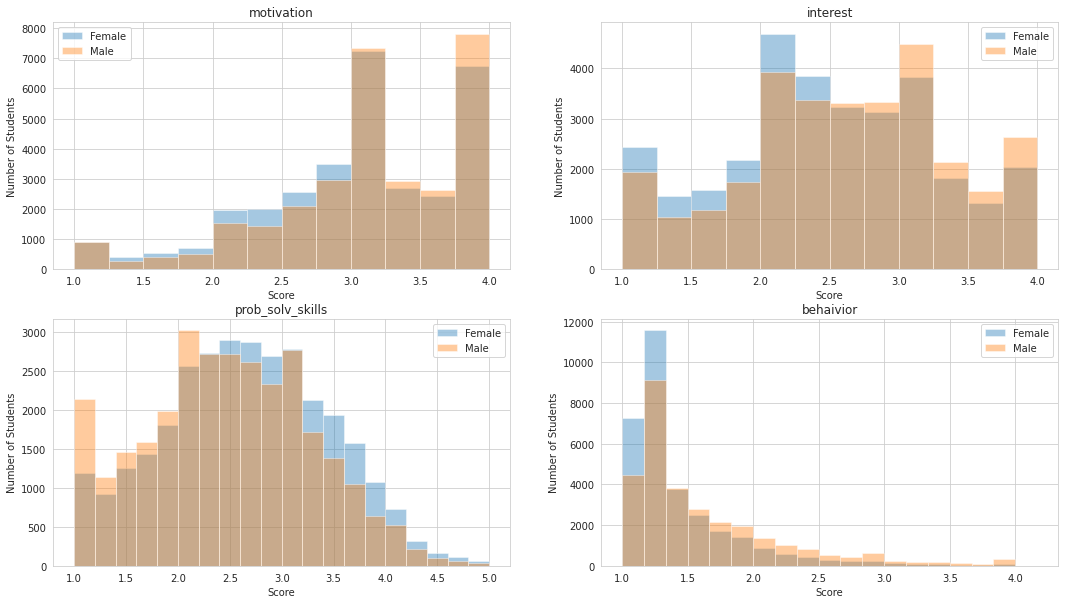

In [67]:
#creating a Subsection
subsection =['motivation','interest', 'prob_solv_skills', 'behaivior']

fig, ax= plt.subplots(nrows=2,ncols=2,figsize=[18,10])

#binsizes were determined by number of questions per section.
#binsizes = 1/(number of questions per section)
binsizes=[1/4,1/4,1/5,1/6]

ax=ax.flatten()
i=0

for feat in subsection:
    bins=np.arange(min(data[feat]), max(data[feat]) +binsizes[i], binsizes[i])
    ax[i].hist(data=data.query('gender=="Female"'), x=feat, bins=bins,label='Female', alpha=.4)
    ax[i].hist(data=data.query('gender=="Male"'),x=feat, bins=bins,label='Male', alpha=.4)
    
    ax[i].set_xlabel('Score')
    ax[i].set_ylabel('Number of Students')
    ax[i].set_title(feat)
    ax[i].legend()
    i+=1

#plt.savefig('attitudes_gender.png')

we can point out from the visualizations above interms of motivation, males score higher and tend to be more motivated than females 
looking at the distribution comparing the male ad female gender interms of problem solving skills, we have more males scoring low when compared to their female counterparts who on average performed better
in terms of students extracuricular behaiviors, we see a positvely skewd distribution,and a large number of females score low in partaking in extracuricuar activities, unlike their male counterparts.
In general male ted to show more interest in maths than the females


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Males tend to be more motivated and show more interest in Maths than females on average
> Females tend to perform better in reading than their male counterparts
> The distribution of the students performance is normal
> we can observe an interesting finding here, we see that though males outperformed their female counterparts in other performance idexs, the female tend to be better at problem solving ability and skills
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> italy seems to be the best performing coutry in terms of student average performance, this calls for further investigation, as this spike could also be an indication of a simply imbalanced sample data and not a true reflection 

## Multivariate Exploration

> Now lets move on to Create plots of three or more variables to investigate our sample data even
further. 

we start off by checking out for correlation between the features to explore which of the relationships are the strongest? whhich relatioships are the weakest etc

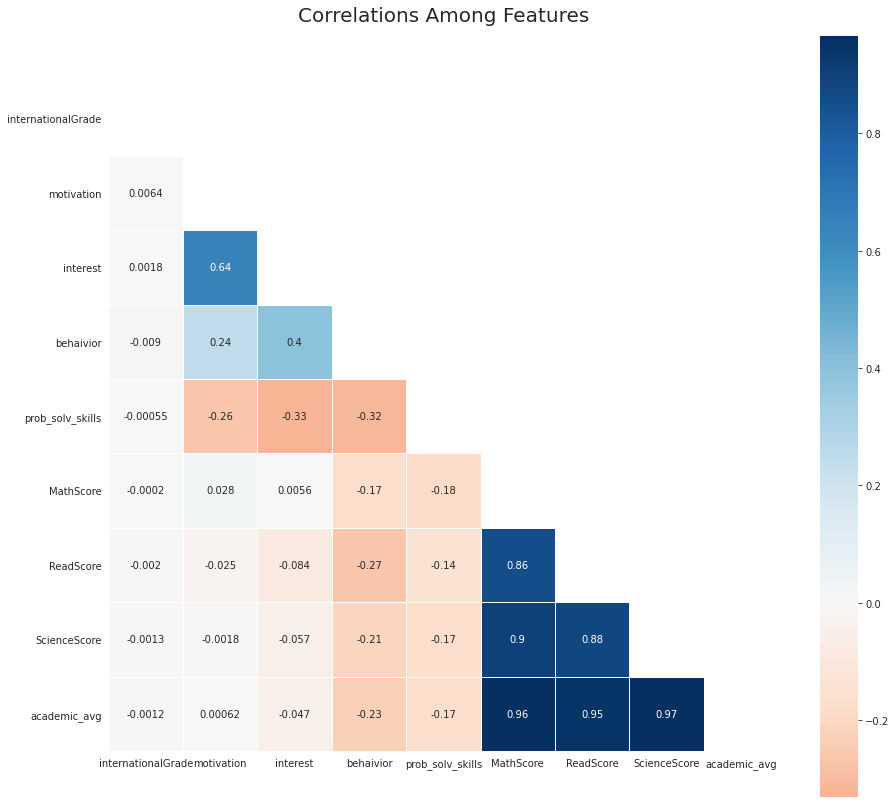

In [77]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,14))
sb.heatmap(data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);
plt.savefig('correlations_feat.png')

we can point out from the plot correlations that are strong, the strogest correlation is between interest and motivation
we have a fairly strong relatioship between interest and behaivior too, as well as behaivior and motivation.
we can observe some abormally strong correlation with the performance scores(maths, science,read) thats a feature worth investigating

Next we move to investigate seemingly high correlation in the subset of performance scores

Text(0.5, 0.98, 'Math score vs Read score vs Science score')

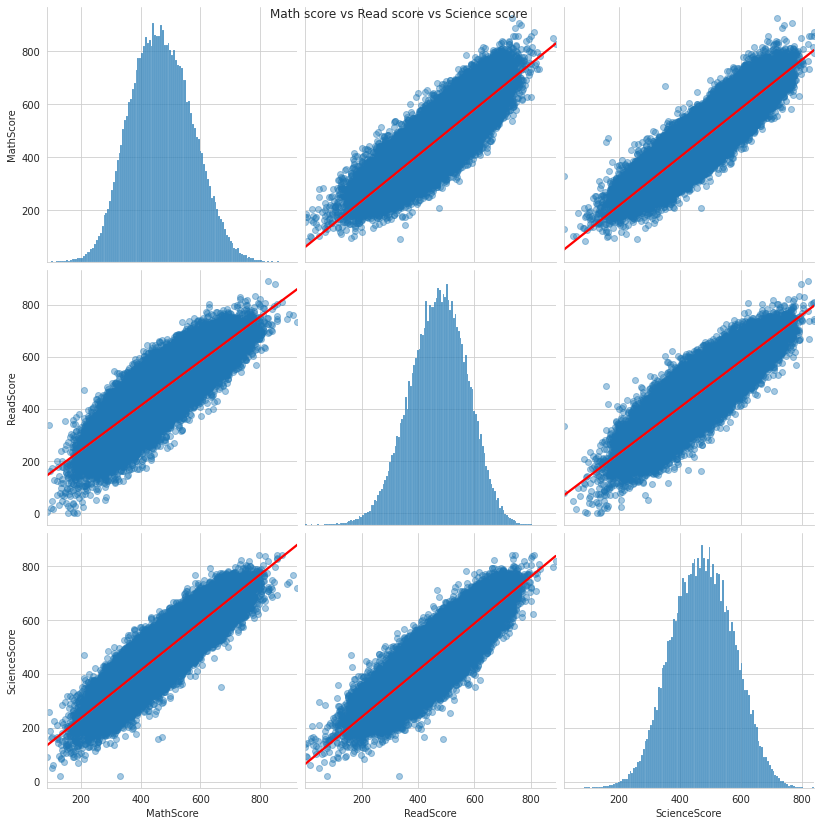

In [69]:
#get subset of train dataset for analysis
pair = data[['MathScore', 'ReadScore', 'ScienceScore']]


#create pairplot of nght_mainland, night_zanzibar and total_cost
g = sb.pairplot(pair, kind='reg',  plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}})
g.fig.set_size_inches(12,12)
g.fig.suptitle('Math score vs Read score vs Science score')

from the plot, we can conclude from the high positive correlation between the features 
that a student who scores high in maths is also likely to score high in reading ad in science as well.
Lucky for us, we are not building a regression model, multicollinearity would have been a problem.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The next most significant relationships to academic performance are motivation, interest. The correlation map also shows why the quantitative variables must be separated into categorical groups for meaningful analysis, with a majority of the data showing insignificant to no correlation.


## Conclusions

>In this exploration, I found that the top performing students were majority males, they showed more interest in Maths and Sciences, while the female only edge males in reading.

>We can also see a pattern among the student drive(attitude) towards math in the top performing students. As the top pecentile of students increases, the male students' average scores for motivation, behavior, interest, was higher than the female students' average scores under these categories.

>A point worth of mention is that given the high scores of males we also noticed females edged out males in terms of problem solving skills, which begs further questions like since males scored higher on the other performance indexes, why is't this translated into their problem solving skills or ability?

>In conclusion, this Analysis requires further investigations, especially on the relationships between the variables

## Reference
- [Fabien Daniel 2015,Kaggle,Accessed November 9, 2022](https://www.kaggle.com/code/fabiendaniel/predicting-flight-delays-tutorial)

- [Stackoverflow, Accessed October 28, 2022](https://stackoverflow.com)

- [Jade Maria, Github, Accessed November 3 2022](https://github.com/cooljade007/communicate_data_findings/blob/master/pisa2012_Part1.ipynb)

- [Bruno de Assis, Github, Accessed November 9, 2022](https://github.com/brunoassisp/PISA-Data-Viz-project) 
